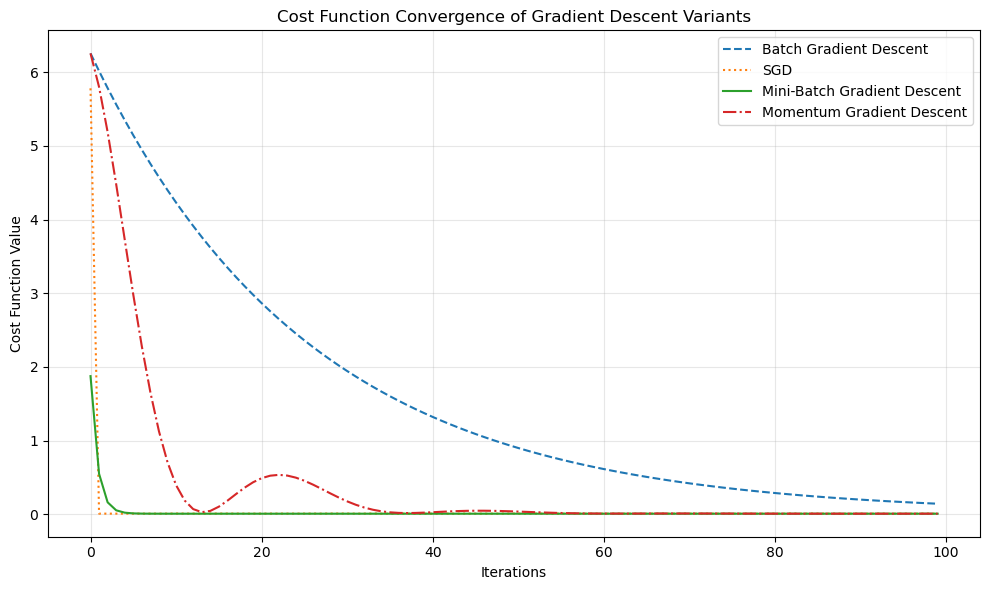

Final Costs:
Batch Gradient Descent: 0.1448
Stochastic Gradient Descent: 0.0102
Mini-Batch Gradient Descent: 0.0094
Momentum Gradient Descent: 0.0095


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ========== Data Generation ==========
def generate_synthetic_data(seed=42, m=1000, n=10, noise_level=0.1):
    """
    Generate a synthetic dataset for linear regression.
    """
    np.random.seed(seed)
    true_theta = np.random.randn(n)
    X = np.random.randn(m, n)
    noise = np.random.randn(m) * noise_level
    y = X.dot(true_theta) + noise
    X_b = np.c_[np.ones((m, 1)), X]  # Add bias term
    return X_b, y, true_theta

# ========== Cost Function ==========
def cost_function(X, y, theta):
    """
    Compute the Mean Squared Error cost.
    """
    return np.mean((X.dot(theta) - y) ** 2)

# ========== Gradient Descent Variants ==========
def batch_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    """
    Perform Batch Gradient Descent.
    """
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for _ in range(iterations):
        gradients = 2 / m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

def stochastic_gradient_descent(X, y, learning_rate=0.01, iterations=100):
    """
    Perform Stochastic Gradient Descent.
    """
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for _ in range(iterations * m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_rate * gradients
        if _ % m == 0:
            cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

def mini_batch_gradient_descent(X, y, batch_size=32, learning_rate=0.01, iterations=100):
    """
    Perform Mini-Batch Gradient Descent.
    """
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    for epoch in range(iterations):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            gradients = 2 / len(X_batch) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradients
        cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

def momentum_gradient_descent(X, y, learning_rate=0.01, iterations=100, momentum=0.9):
    """
    Perform Momentum-Based Gradient Descent.
    """
    m, n = X.shape
    theta = np.zeros(n)
    velocity = np.zeros(n)
    cost_history = []
    for _ in range(iterations):
        gradients = 2 / m * X.T.dot(X.dot(theta) - y)
        velocity = momentum * velocity + learning_rate * gradients
        theta -= velocity
        cost_history.append(cost_function(X, y, theta))
    return theta, cost_history

# ========== Main Execution ==========
if __name__ == "__main__":
    # Generate synthetic data
    X_b, y, true_theta = generate_synthetic_data()

    # Run gradient descent variants
    theta_batch, cost_batch = batch_gradient_descent(X_b, y)
    theta_sgd, cost_sgd = stochastic_gradient_descent(X_b, y)
    theta_mini_batch, cost_mini_batch = mini_batch_gradient_descent(X_b, y)
    theta_momentum, cost_momentum = momentum_gradient_descent(X_b, y)

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(cost_batch, label="Batch Gradient Descent", linestyle="--")
    plt.plot(cost_sgd, label="SGD", linestyle=":")
    plt.plot(cost_mini_batch, label="Mini-Batch Gradient Descent", linestyle="-")
    plt.plot(cost_momentum, label="Momentum Gradient Descent", linestyle="-.")
    plt.title("Cost Function Convergence of Gradient Descent Variants")
    plt.xlabel("Iterations")
    plt.ylabel("Cost Function Value")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Print final costs
    print("Final Costs:")
    print(f"Batch Gradient Descent: {cost_batch[-1]:.4f}")
    print(f"Stochastic Gradient Descent: {cost_sgd[-1]:.4f}")
    print(f"Mini-Batch Gradient Descent: {cost_mini_batch[-1]:.4f}")
    print(f"Momentum Gradient Descent: {cost_momentum[-1]:.4f}")


